Data Frame: 
   x1  x2   y
0   4   1   2
1   2   8 -14
2   1   0   1
3   3   2  -1
4   1   4  -7
5   6   7  -8

 Loss: 
0       4.000000
1     215.502400
2       2.825089
3      25.183696
4       2.703944
5      39.437509
6       0.079794
7      45.485374
8       0.414151
9       4.161373
10      0.658158
11      6.762233
12      0.000164
13      6.585837
14      0.045520
15      0.525677
16      0.099272
17      0.899490
18      0.001459
19      0.787665
20      0.003423
21      0.055453
22      0.011455
23      0.107461
Name: loss, dtype: float64


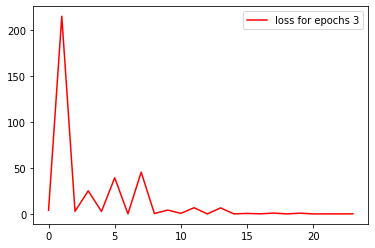

In [2]:
# Activity-Stochastic Gradient Descent 
# Create the log table containing these columns and fill out the table for 1 epoch for the dataset provided in the example below:
# https://towardsdatascience.com/step-by-step-tutorial-on-linear-regression-with-stochastic-gradient-descent-1d35b088a843

import pandas as pd
# creating a dataframe for the dataset
d = {'x1': [4, 2, 1,3,1,6], 'x2': [1, 8,0, 2,4,7], 'y': [2, -14, 1, -1, -7, -8]}
df = pd.DataFrame(data=d)
print ("Data Frame: ")
print(df)

# batch size =1, so we have 6 batches altogether. 
# We complete 1 epoch when the model has iterated through all the batches once.
 
# we are reporting : x1, x2, y, y_hat, (y- y_hat), w1, w2, b  ... assuming y_hat = w1x1 + w2x2 + b
# goal: find the best w (weight) and b (bias) values using Stochastic GD. 

# Initializing the weights 
w_1 = 0.0
w_2 = 0.0
b=0 
a = 0.01  # learning rate
data= []

for epoch in range(0,4):
    # Batch size = 1 , so we have 6 batches in 1 epoch: 
    for i in range(0, 6):  # the size of dataset is 6 (6 samples)
        x_1 = df.loc[i][0]
        x_2 = df.loc[i][1]
        y = df.loc[i][2]
        y_hat = (w_1*x_1) + (w_2*x_2) + b
        loss = pow((y - y_hat) , 2)
    
        data.append([x_1, x_2, y, y_hat, loss, (y - y_hat) ,w_1,w_2,b])
    
        # updated parameters
        w_1 = w_1 + a*(2* (y - y_hat) *x_1)
        w_2 = w_2 + a*(2*(y - y_hat)*x_2)
        b = b + a*(2* (y - y_hat)*1)
        # end of the ith batch
    
output = pd.DataFrame(data, columns=['x1', 'x2', 'y', 'y_hat', 'loss' , 'y - y_hat' , 'w1', 'w2' , 'b'])

print("\n Loss: ")
print (output['loss'])
import matplotlib.pyplot as plt
plt.plot(output['loss'],'r-',label='loss for epochs '+ str(epoch) ) 
plt.legend()
plt.show()


|| x1 | x2 | y | y_hat | loss | y-y_hat | w1 | w2 | b |
|---| --- | --- | --- | --- | --- | --- | --- | --- | --- |
|0| 4 | 1 | 2 | 0 | 4 | 2 | 0 | 0 | 0 |
|1| 2 | 8 | -14 | 0.68 | 215.5 | -14.68 | 0.16 | 0.04 | 0.04 |
|2| 1 | 0 | 1 | -0.68 | 2.83 | 1.68 | -0.43 | -2.31 | -0.25
|3| 3 | 2 | -1 | -6.02 | 25.18 | 5.02 | -0.39 | -2.31 | -0.22 |
|4| 1 | 4 | -7 | -8.64 | 2.7 | 1.64 | -0.09 | -2.11 | -0.12 |
|5| 6 | 7 | -8 | -14.28 | 39.44 | 6.28 | -0.06 | -1.98 | -0.09 |

Table for part 1

Data Frame: 
   x1  x2   y
0   4   1   2
1   2   8 -14
2   1   0   1
3   3   2  -1
4   1   4  -7
5   6   7  -8
6   5   4  -2
7   9   6   5
8   2   1  -3

 Loss: 
0      296.482802
1       38.000000
2       25.483067
3       54.078102
4       56.064821
          ...    
115     38.339579
116     34.995935
117     53.604360
118     38.134606
119     35.143758
Name: loss, Length: 120, dtype: float64


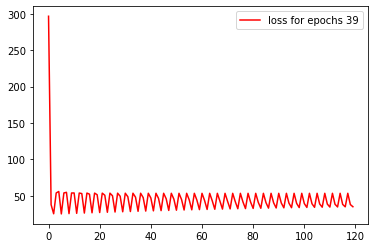

In [33]:
# Batch Gradient Descent
import statistics
# Added some extra data
d = {'x1': [4, 2, 1,3,1,6, 5,9,2], 'x2': [1, 8,0, 2,4,7,4,6,1], 'y': [2, -14, 1, -1, -7, -8,-2,5,-3]}
df = pd.DataFrame(data=d)
print ("Data Frame: ")
print(df)

# Initializing the weights 
w_1 = 0.0
w_2 = 0.0
b=0 
a = 0.01  # learning rate
data= []
batch_size = 3
w1_list = []
w2_list = []
b_list = []

for epoch in range(0,40):
    # Batch size = 3 , so we have 3 batches in 1 epoch: 
    for i in range(0, 3):  # the size of dataset is 9 (9 samples)
        y_hats = []
        losses = []
        for j in range(i * batch_size, (i+1) * batch_size):
            x_1 = df.loc[j][0]  
            x_2 = df.loc[j][1]
            y = df.loc[j][2]
            y_hats.append((w_1*x_1) + (w_2*x_2) + b)
            losses.append(pow((y - y_hat) , 2))
        # Calculating values based off the average from a batch
        y_hat = statistics.mean(y_hats)
        loss = statistics.mean(losses)
        data.append([x_1, x_2, y, y_hat, loss, (y - y_hat) ,w_1,w_2,b])
        for j in range(i * batch_size, (i+1) * batch_size):
            x_1 = df.loc[j][0]  
            x_2 = df.loc[j][1]
            y = df.loc[j][2]
            w_1 = w_1 + a*(2* (y - y_hat) *x_1)
            w_2 = w_2 + a*(2*(y - y_hat)*x_2)
        w_1 = w_1 / batch_size
        w_2 = w_2 / batch_size
        b = b + a*(2* (y - y_hat)*1)
        # end of the ith batch

# Couldn't quite get it to converge
output = pd.DataFrame(data, columns=['x1', 'x2', 'y', 'y_hat', 'loss' , 'y - y_hat' , 'w1', 'w2' , 'b'])

print("\n Loss: ")
print (output['loss'])
import matplotlib.pyplot as plt
plt.plot(output['loss'],'r-',label='loss for epochs '+ str(epoch) ) 
plt.legend()
plt.show()